In [1]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
random.seed(100)
import pandas as pd

C:\Users\man\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\man\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\man\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\User

In [2]:
# use TensorFlow backend
%env KERAS_BACKEND=tensorflow     
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, \
                Input, GlobalAveragePooling2D
from keras.preprocessing import image

import keras
import tensorflow
import logging
logging.basicConfig()
import struct

# use channels first representation for images
from keras import backend as K
K.set_image_data_format('channels_first')

from keras.callbacks import TensorBoard

env: KERAS_BACKEND=tensorflow


C:\Users\man\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def plot_history(history): 
    fig, ax1 = plt.subplots()
    
    ax1.plot(history.history['loss'], 'r', label="training loss ({:.6f})".format(history.history['loss'][-1]))
    ax1.plot(history.history['val_loss'], 'r--', label="validation loss ({:.6f})".format(history.history['val_loss'][-1]))
    ax1.grid(True)
    ax1.set_xlabel('iteration')
    ax1.legend(loc="best", fontsize=9)    
    ax1.set_ylabel('loss', color='r')
    ax1.tick_params('y', colors='r')

    if 'acc' in history.history:
        ax2 = ax1.twinx()

        ax2.plot(history.history['acc'], 'b', label="training acc ({:.4f})".format(history.history['acc'][-1]))
        ax2.plot(history.history['val_acc'], 'b--', label="validation acc ({:.4f})".format(history.history['val_acc'][-1]))

        ax2.legend(loc="best", fontsize=9)
        ax2.set_ylabel('acc', color='b')        
        ax2.tick_params('y', colors='b')

# Training

In [4]:
traindf = pd.read_csv('converted_1.csv')
random.seed(100)
traindf = traindf.sample(2000)
X = array(traindf.drop('action', axis=1))
Y = list(traindf.iloc[:,-1])

In [5]:
trainX, testX, trainY, testY = \
    model_selection.train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=4487)

# make validation data
testset = (testX, testY)

print(trainX.shape)
print(testX.shape)

(1600, 19)
(400, 19)


In [6]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
trainXn = scaler.fit_transform(trainX)  
testXn  = scaler.transform(testX)

testsetn = (testXn, testY)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 1,219
Trainable params: 1,219
Non-trainable params: 0
_________________________________________________________________
test testing set accuracy= 0.645


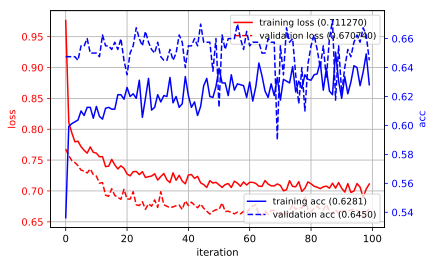

In [7]:
random.seed(100)
tensorflow.set_random_seed(1000)
callbacks_list = []

nn = Sequential()
nn.add(Dense(units=32, activation='relu',input_dim=trainX.shape[1]))
nn.add(Dropout(rate=0.5, seed=44))
nn.add(Dense(units=16, activation='relu'))
nn.add(Dropout(rate=0.5, seed=44))
nn.add(Dense(units=3, activation='softmax'))

# compile and fit the network
nn.compile(loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(lr=0.02, momentum=0.9, nesterov=True),
    metrics=['accuracy'])

history = nn.fit(trainX, trainY, epochs=100, batch_size=50,
    callbacks=callbacks_list,
    validation_data=testset, verbose=False)

nn.summary()
plot_history(history)
predY = nn.predict_classes(testX, verbose=False)
# calculate accuracy
acc = metrics.accuracy_score(testY, predY)
print("test testing set accuracy=", acc)

In [8]:
# random.seed(100)
# tensorflow.set_random_seed(1000)
# callbacks_list = []

# nnx = Sequential()
# nnx.add(Dense(units=32, activation='relu',input_dim=trainX.shape[1]))
# nnx.add(Dropout(rate=0.5, seed=44))
# nnx.add(Dense(units=16, activation='relu'))
# nnx.add(Dropout(rate=0.5, seed=44))
# nnx.add(Dense(units=3, activation='softmax'))

# # compile and fit the network
# nnx.compile(loss=keras.losses.sparse_categorical_crossentropy,
#     optimizer=keras.optimizers.SGD(lr=0.02, momentum=0.9, nesterov=True),
#     metrics=['accuracy'])

# history = nnx.fit(trainXn, trainY, epochs=100, batch_size=50,
#     callbacks=callbacks_list,
#     validation_data=testsetn, verbose=False)

# nnx.summary()
# plot_history(history)
# predY = nnx.predict_classes(testXn, verbose=False)
# # calculate accuracy
# acc = metrics.accuracy_score(testY, predY)
# print("test testing set accuracy=", acc)

# Server

In [ ]:
# import socket programming library 
import socket 
import json

# import thread module 
from _thread import *
import threading 

def send_thread(c, b): 
    c.send(b + b'\n')

def exec_recv_data(j):
    a = j['action']
    if a == 1:
        append_to_file(j, c)
    elif a == 2:
        predict_action(j, c)

def predict_action(j):
    print('Predict action by {}, length: {}'.format(j['input'], len(j['input'])) )    
    predY = nn.predict_proba(array([j['input']]), verbose=False)
    print('Prediction: {}'.format(predY[0]))
    print(list(predY[0]))
    print(type(list(predY[0])))
    return list(predY[0])
    
def append_to_file(j):
    t = j['type']
    filename = 'texasholdem_type_{}.txt'.format(t)
    f = open(filename, 'a')
    f.write(j['data'] + '\n')
    f.close()
    print('Saved to {}'.format(filename))

print_lock = threading.Lock() 

# thread fuction 
def threaded(c):
    data_str = '' 
    while True: 
        try:
            # data received from client 
            data = c.recv(1024)
            print("recv: " + data.decode('utf-8'))

            data_str += data.decode('utf-8')
            for d in data_str.splitlines():
                try:
                    j = json.loads(d)
                    a = j['action']
                    if a == 1:
                        append_to_file(j)
                        c.send(json.dumps({'success': [j['uuid']]}).encode() + b'\n')
                        print('sent')
                    elif a == 2:
                        pred = predict_action(j)
                        c.send(b'{'+bytes(bytearray('"output": [{:f},{:f},{:f}]'.format(pred[0],pred[1],pred[2]), 'utf-8')) + b'}\n')
                        print('sent')
                        
                except:
                    data_str = d
                    
            
            if not data: 
                print('Bye') 

                # lock released on exit 
                print_lock.release() 
                break

            # reverse the given string from client 
    #         data = data[::-1] 

            # send back reversed string to client 
#             c.send(data+b'\n') 
        except:
            print("error")
            print_lock.release()
            break
            
    # connection closed 
    c.close() 
  
  
host = "127.0.0.1" 
#     host = "192.168.1.104"

# reverse a port on your computer 
port = 8808
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM) 
s.bind((host, port)) 
print("socket binded to post", port) 

# put the socket into listening mode 
s.listen(5) 
print("socket is listening") 

# a forever loop until client wants to exit 
while True: 

    # establish connection with client 
    c, addr = s.accept() 

    # lock acquired by client 
    print_lock.acquire() 
    print('Connected to :', addr[0], ':', addr[1]) 

    # Start a new thread and return its identifier 
    start_new_thread(threaded, (c,)) 
s.close() 


socket binded to post 8808
socket is listening
Connected to : 127.0.0.1 : 9498
recv: {"action":2,"input":[1,0,0,0,4,3,6,0,0,0,0,0,0,0,0,0,0,0,0.5]}

Predict action by [1, 0, 0, 0, 4, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5], length: 19
Prediction: [0.05947147 0.23082408 0.70970446]
[0.059471466, 0.23082408, 0.70970446]
<class 'list'>
sent
recv: {"action":2,"input":[0,1,0,0,4,3,6,0,2,3,5,2,0,0,0,0,0,0,0.5]}

Predict action by [1, 0, 0, 0, 4, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5], length: 19
Prediction: [0.05947147 0.23082408 0.70970446]
[0.059471466, 0.23082408, 0.70970446]
<class 'list'>
sent
Predict action by [0, 1, 0, 0, 4, 3, 6, 0, 2, 3, 5, 2, 0, 0, 0, 0, 0, 0, 0.5], length: 19
Prediction: [6.580309e-05 5.474651e-01 4.524691e-01]
[6.580309e-05, 0.5474651, 0.4524691]
<class 'list'>
sent
recv: 
Predict action by [1, 0, 0, 0, 4, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5], length: 19
Prediction: [0.05947147 0.23082408 0.70970446]
[0.059471466, 0.23082408, 0.70970446]
<class 'l

In [ ]:
import json
x = list(array([0.059171945, 0.20530874, 0.7355193]))
print(type(x))
print({'output': x})
print(json.dumps({'output': x}))
print(json.dumps({'output': x}).encode() + b'\n')
print(json.dumps({'output': [0.059296142, 0.2484241, 0.69227976]}))